In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# aléa
from numpy.random import default_rng, SeedSequence
sq = SeedSequence()
rng = default_rng(sq)

# Descente de gradient

On trace f.

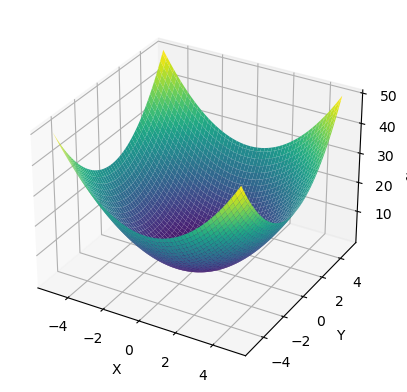

In [3]:

from mpl_toolkits.mplot3d import Axes3D

# Définir la fonction convexe f(x, y)
def f(x, y):
    return x**2 + y**2

# Générer des valeurs pour x et y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Créer une figure 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer la surface 3D
ax.plot_surface(X, Y, Z, cmap='viridis')

# Afficher l'étiquette des axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')

# Afficher le graphique
plt.show()

In [4]:
def df(x,y):
    return (2*x,2*y)

def descente(f, df, x0, gamma=1e-2, eps=1e-5, maxIter=1000):
    x0 = np.array(x0)
    x=np.array([x0])
    grad = np.array(df(*x0))
    while np.linalg.norm(grad)>eps: # tant que la pente n'est pas approximativement nulle
        x=np.vstack((x,x[-1]-gamma*grad)) # on effectue un petit pas vers le bas
        grad = np.array(df(*x[-1])) # on calcule la pente
        
        if len(x) > maxIter:
            print("nombre d'itération trop élevée, dernière valeur :", x[-1])
            return None # on abandonne si le nombre d'itérations est trop élevé
    return x

print(descente(f,df,x0=(-10,-10),gamma=1,eps=1e-3,maxIter=1000))

nombre d'itération trop élevée, dernière valeur : [-10 -10]
None


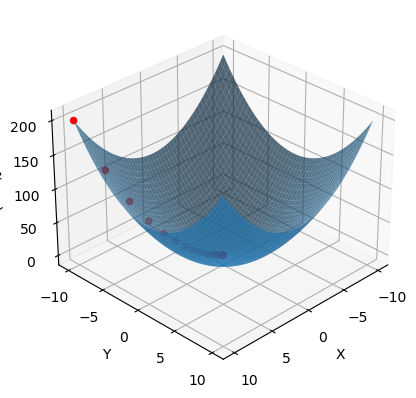

In [5]:
desc=descente(f,df,x0=(10,-10),gamma=1e-1,eps=1e-3,maxIter=1000)
fdesc=f(desc[:,0],desc[:,1])

# Générer des valeurs pour x et y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

suiteX=desc[:,0]
suiteY=desc[:,1]
suiteZ=fdesc

# Créer une figure 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer la surface 3D
ax.plot_surface(X, Y, Z,alpha=0.7)
ax.scatter(suiteX, suiteY, suiteZ, c='r', marker='o')

# Afficher l'étiquette des axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')

# Afficher le graphique
ax.view_init(azim=45, elev=30)

plt.show()

### Si la fonction n'est pas convexe ?

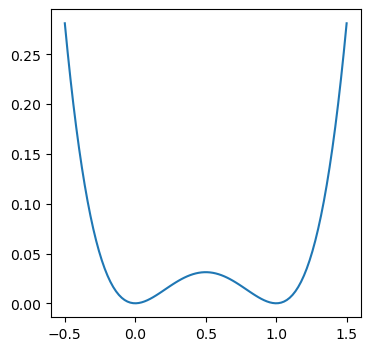

In [6]:
fig , ax = plt.subplots(figsize=(4,4))
ax.plot(np.linspace(-0.5,1.5,100), (lambda x: 0.5*x**4-x**3+0.5*x**2)(np.linspace(-0.5,1.5,100)))

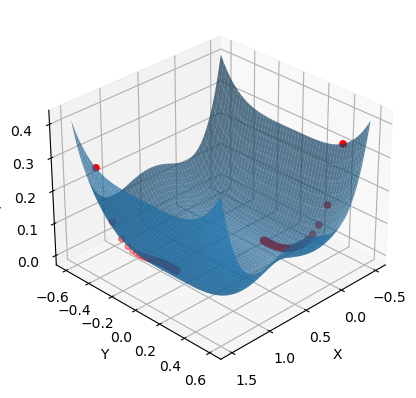

In [7]:
# Définir la fonction non convexe f(x, y), elle admet deux minimum locaux
def f(x, y):
    return 0.5*x**4-x**3+0.5*x**2+y**4

def df(x,y):
    return (2*x**3-3*x**2+x,4*y**3)

desc1=descente(f,df,x0=(-0.5,0.4),gamma=1e-1,eps=1e-3,maxIter=1000)
fdesc1=f(desc1[:,0],desc1[:,1])

desc2=descente(f,df,x0=(1.5,-0.4),gamma=1e-1,eps=1e-3,maxIter=1000)
fdesc2=f(desc2[:,0],desc2[:,1])

# Générer des valeurs pour x et y
x = np.linspace(-0.5,1.5, 100)
y = np.linspace(-0.6, 0.6, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

suite1X=desc1[:,0]
suite1Y=desc1[:,1]
suite1Z=fdesc1

suite2X=desc2[:,0]
suite2Y=desc2[:,1]
suite2Z=fdesc2

# Créer une figure 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer la surface 3D
ax.plot_surface(X, Y, Z,alpha=0.7)
ax.scatter(suite1X, suite1Y, suite1Z, c='r', marker='o')
ax.scatter(suite2X, suite2Y, suite2Z, c='r', marker='o')


# Afficher l'étiquette des axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')

# Afficher le graphique
ax.view_init(azim=45, elev=30)

plt.show()

## Application : régression linéaire OLS

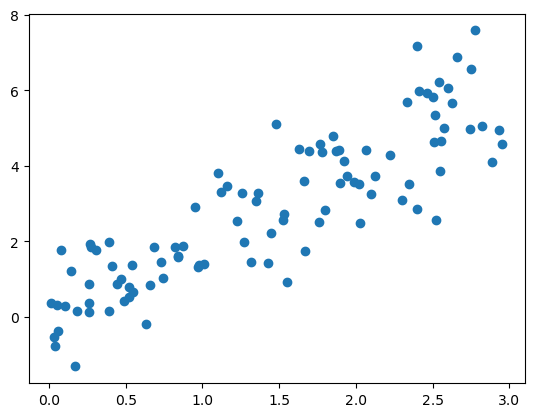

In [8]:
# On génère des données de régression
N=100
b, a= 2, 0
x=rng.uniform(0,3,N)
y=b*x+rng.normal(a,1,N)
plt.scatter(x,y)

In [9]:
# On cherche maintenant à minimiser la norme L2 sur les paramètres alpha et beta 
def loss(data_X : np.array, data_Y : np.array, alpha, beta):
    df=(data_Y-beta*data_X-alpha)**2
    return np.sum(df)

def grad_loss(data_X, data_Y, alpha, beta):
    dalpha=-2*np.sum(data_Y-beta*data_X-alpha)
    dbeta=-2*np.sum((data_Y-beta*data_X-alpha)*data_X)
    return (dalpha,dbeta)


loss(x,y,0,2)

96.95647936121684

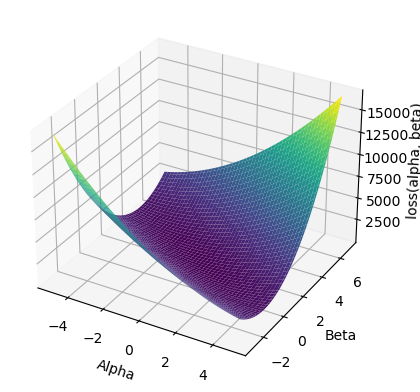

In [10]:
# il s'agit donc de minimiser loss(x,y): (alpha,beta) dans R2 -> loss(x,y,alpha,beta) dans R

def fXY(alpha,beta): return loss(x,y,alpha,beta)
def dfXY(alpha,beta): return grad_loss(x,y,alpha,beta)

# Générer des valeurs pour alpha et beta
alpha = np.linspace(-5, 5, 100)
beta = np.linspace(-3, 7, 100)

ALPHA, BETA = np.meshgrid(alpha, beta)

Z = np.empty_like(ALPHA)

# Calculer la perte pour chaque combinaison d'alpha et beta
for i in range(len(alpha)):
    for j in range(len(beta)):
        Z[i, j] = fXY(ALPHA[i, j], BETA[i, j])


# Créer une figure 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer la surface 3D
ax.plot_surface(ALPHA, BETA, Z, cmap='viridis')

# Afficher l'étiquette des axes
ax.set_xlabel('Alpha')
ax.set_ylabel('Beta')
ax.set_zlabel('loss(alpha, beta)')

# Afficher le graphique
plt.show()

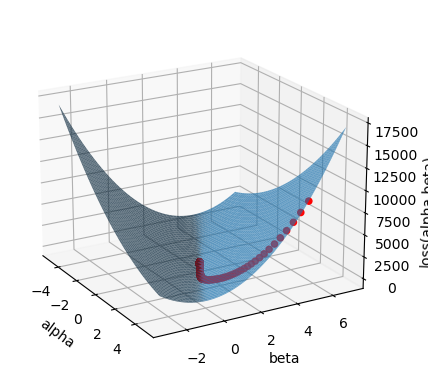

In [11]:
desc=descente(fXY,dfXY,x0=(5,5),gamma=1e-4,eps=1e-3,maxIter=10000)
fdesc = np.empty_like(desc[:,0])
for i in range(len(desc[:,0])):
        fdesc[i]=fXY(desc[i,0],desc[i,1])

# Générer des valeurs pour alpha et beta
alpha = np.linspace(-5, 5, 100)
beta = np.linspace(-3, 7, 100)

ALPHA, BETA = np.meshgrid(alpha, beta)

Z = np.empty_like(ALPHA)

# Calculer la perte pour chaque combinaison d'alpha et beta
for i in range(len(alpha)):
    for j in range(len(beta)):
        Z[i, j] = fXY( ALPHA[i, j], BETA[i, j])


suiteX=desc[:,0]
suiteY=desc[:,1]
suiteZ=fdesc

# Créer une figure 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer la surface 3D
ax.plot_surface(ALPHA, BETA, Z,alpha=0.7)
ax.scatter(suiteX, suiteY, suiteZ, c='r', marker='o')

# Afficher l'étiquette des axes
ax.set_xlabel('alpha')
ax.set_ylabel('beta')
ax.set_zlabel('loss(alpha,beta)')

# Afficher le graphique
ax.view_init(azim=-30, elev=20)

plt.show()

In [12]:
desc

array([[5.        , 5.        ],
       [4.8144641 , 4.68674162],
       [4.64156184, 4.39648054],
       ...,
       [0.09311228, 1.93170286],
       [0.09311219, 1.93170291],
       [0.09311211, 1.93170296]])

# Descente de gradient stochastique

In [13]:
# On génère des données de régression
N=100
b, a= 2,0
x=rng.uniform(0,3,N)
y=b*x+rng.normal(a,1,N)

column_of_ones = np.ones((x.shape[0], 1))
x = np.column_stack((column_of_ones,x))

Objectif : minimiser :
$$
\sum_{i=1}^n l(y_i, f_w(x_i))
$$
où $l$ est la loss function. Ici, $f_w(x_i)=w.x_i$ et $l(y_i,f_w(x_i))=(y_i-w.x_i)^2$.

SGD :
$$
w^{(0)}=w_0 \\
w^{(t+1)}=w^{(t)}-\gamma^{(t)} \sum_{i \in B^{(t)}} grad_w l(y_i,f_w(x_i))
$$

Gradient function returns :
$$
-2\sum_{i \in B^{(t)}} x_i(y_i-w.x_i)
$$

In [14]:
def gradient(x_batch, y_batch, vector):
    S=np.empty_like(x_batch[0])
    for i in range(len(x_batch)):
        scalar=-2*(y_batch[i]-np.dot(vector, x_batch[i]))
        vect=scalar*x_batch[i]
        S=np.vstack((S,vect))
    return np.sum(S,axis=0)
    

def SGD(x,y,start, batch_size=1,gamma=1e-2, tolerance=1e-5, n_iter=1000):
    
    n_obs = x.shape[0]
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]
    vector = np.array(start, dtype=float)
    
    for _ in range(n_iter):
        # Shuffle x and y
        rng.shuffle(xy)

        # Performing minibatch moves
        for start in range(0, n_obs, batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:]

            # Recalculating the difference
            grad = np.array(gradient(x_batch, y_batch, vector))
            diff = -gamma * grad

            # Checking if the absolute difference is small enough
            if np.all(np.abs(diff) <= tolerance):
                break

            # Updating the values of the variables
            vector += diff
        
    return vector

In [15]:
SGD(x,y,(5,5))

array([0.14765485, 1.93414511])